In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('twitter.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.shape

(14640, 15)

In [4]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [5]:
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

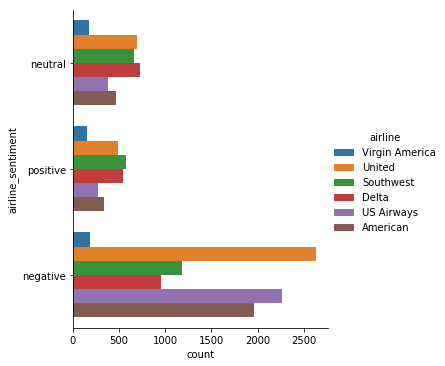

In [52]:
import seaborn as sns
o = sns.catplot(y="airline_sentiment", hue="airline", kind="count",data=data);

In [10]:
pd.pivot_table(data,index=['airline'],columns = ['airline_sentiment' ],values = ['airline_sentiment_confidence'], aggfunc = [len])

len                 
                  airline_sentiment_confidence                 
airline_sentiment                     negative neutral positive
airline                                                        
American                                1960.0   463.0    336.0
Delta                                    955.0   723.0    544.0
Southwest                               1186.0   664.0    570.0
US Airways                              2263.0   381.0    269.0
United                                  2633.0   697.0    492.0
Virgin America                           181.0   171.0    152.0

In [12]:
def opinion(row):
    if (row['airline_sentiment'] == 'positive' or row['airline_sentiment'] == 'neutral'):
        return 0
    else:
        return 1

data['Opinion'] = data.apply(opinion, axis=1)    
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Opinion
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1


In [13]:
frame = data.drop(data.columns[:9],axis=1) 


In [14]:
frame = frame.drop(frame.columns[[0,2,3,4,5]],axis=1) 
frame.head()

,text,Opinion
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,0
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,1
4,@VirginAmerica and it's a really big bad thing...,1


In [15]:
from wordcloud import WordCloud

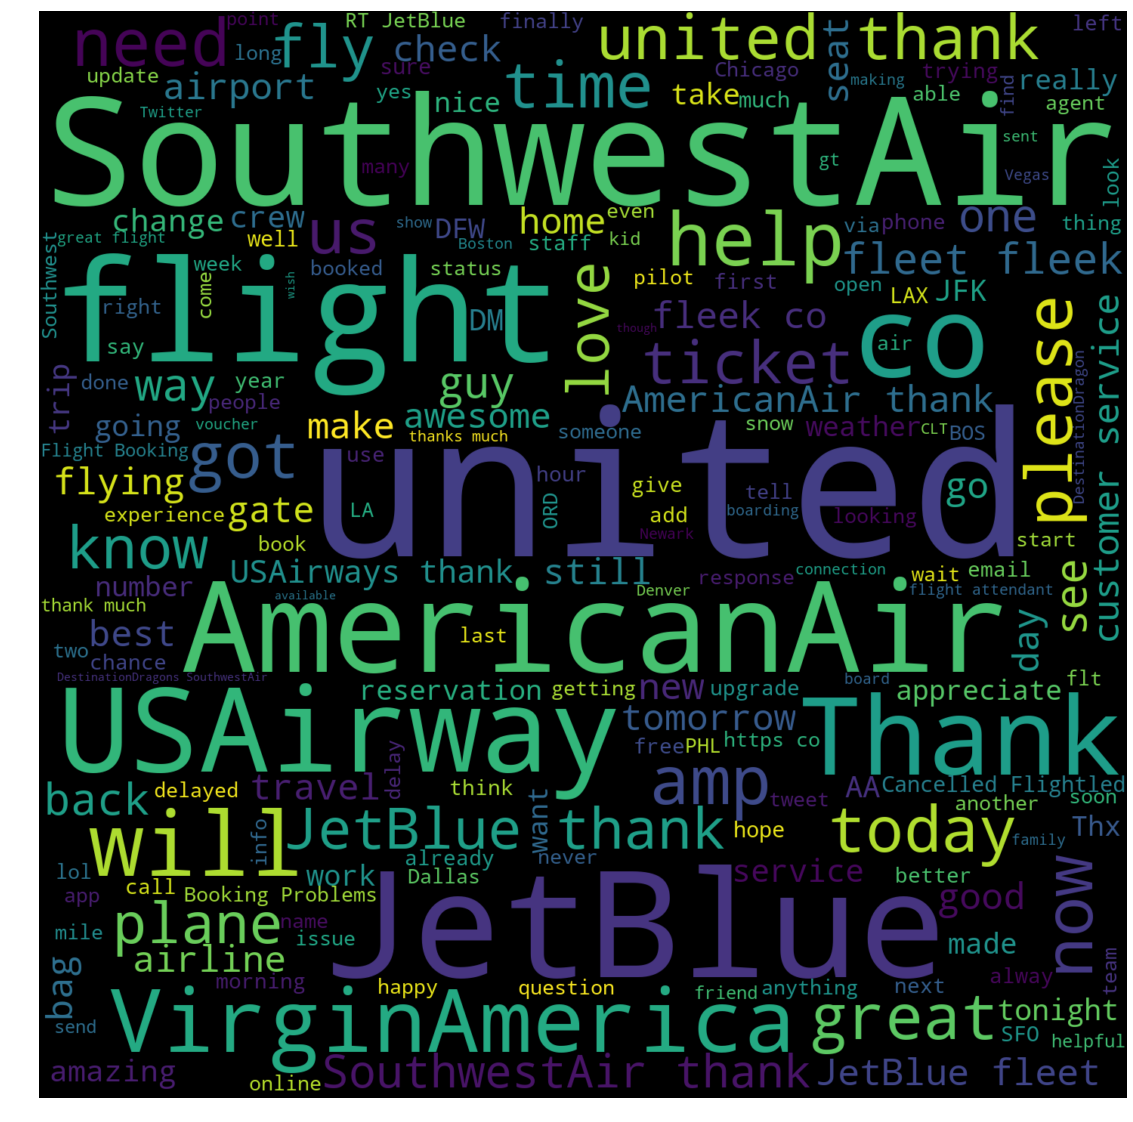

In [42]:
positive = ' '.join(list(frame[frame['Opinion'] ==0]['text']))
pos_wc = WordCloud(width = 1440, height = 1440).generate(positive)
plt.figure(figsize=(20,20))
plt.imshow(pos_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

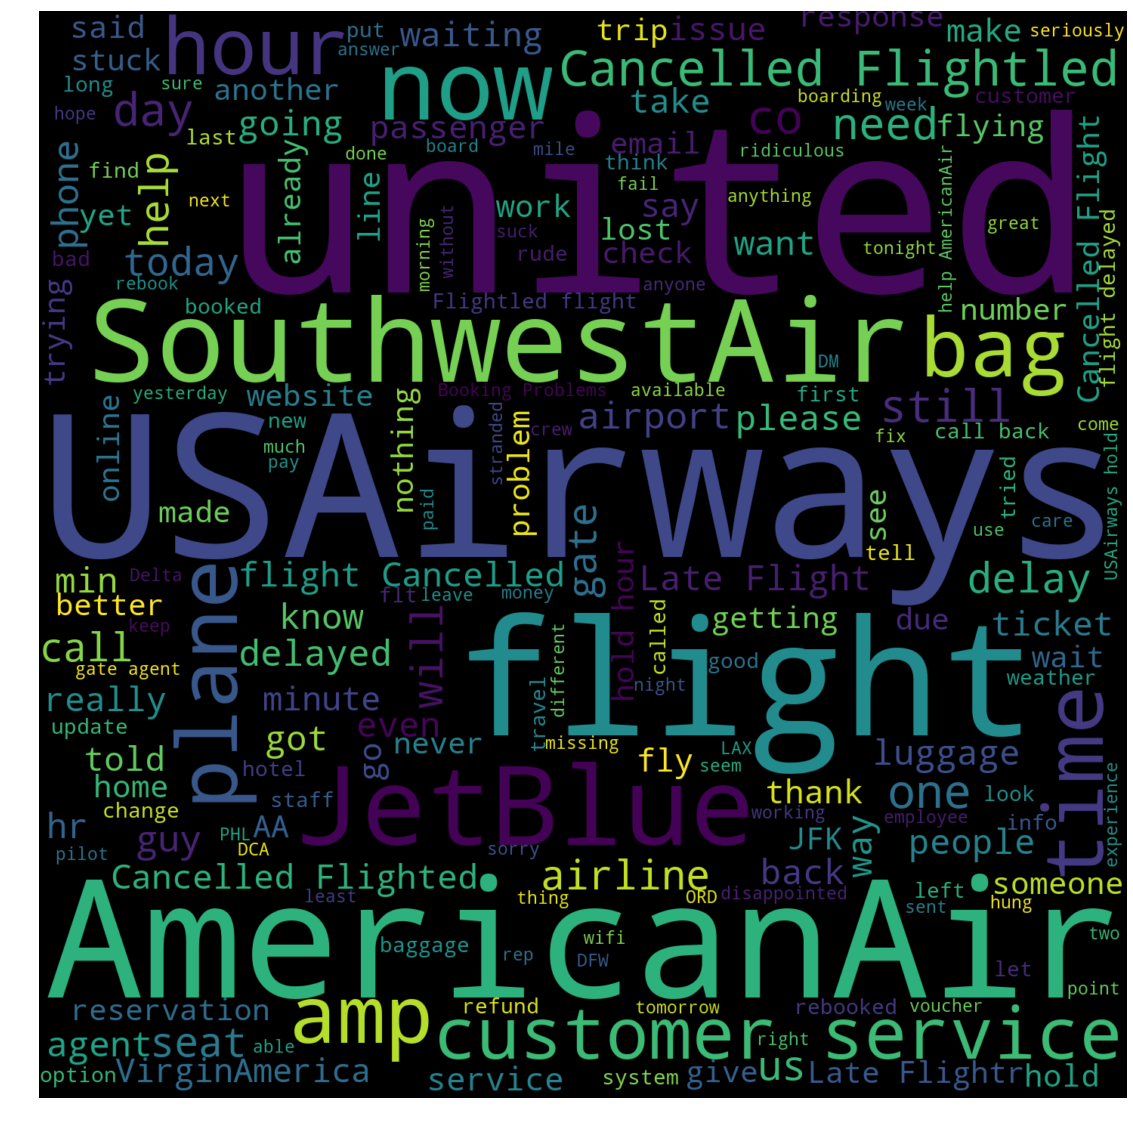

In [41]:
negative = ' '.join(list(frame[frame['Opinion'] ==1]['text']))
neg_wc = WordCloud(width = 1440, height = 1440).generate(negative)
plt.figure(figsize=(20,20))
plt.imshow(neg_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string

In [45]:
#Need to download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pateczka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
#Tokenization (a list of tokens), will be used as the analyzer
#1.Punctuations are [!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]
#2.Stop words in natural language processing, are useless words (data).
def process_text(text):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

In [43]:
#Show the Tokenization (a list of tokens )
frame['text'].head().apply(process_text)

0                      [VirginAmerica, dhepburn, said]
1    [VirginAmerica, plus, youve, added, commercial...
2    [VirginAmerica, didnt, today, Must, mean, need...
3    [VirginAmerica, really, aggressive, blast, obn...
4             [VirginAmerica, really, big, bad, thing]
Name: text, dtype: object

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(frame['text'])


In [49]:
#Split data into 80% training & 20% testing data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, frame['Opinion'], test_size = 0.20, random_state = 0)

In [50]:
y_test.shape

(2928,)

In [53]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4404
           1       0.88      0.97      0.92      7308

   micro avg       0.90      0.90      0.90     11712
   macro avg       0.91      0.88      0.89     11712
weighted avg       0.90      0.90      0.90     11712

Confusion Matrix: 
 [[3469  935]
 [ 224 7084]]

Accuracy:  0.9010416666666666


In [55]:
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.63      0.71      1058
           1       0.81      0.91      0.86      1870

   micro avg       0.81      0.81      0.81      2928
   macro avg       0.81      0.77      0.78      2928
weighted avg       0.81      0.81      0.81      2928

Confusion Matrix: 
 [[ 667  391]
 [ 162 1708]]

Accuracy:  0.8111338797814208
